In [69]:

import sys, os 
sys.path.insert(0, '/Users/anis/test_labnbook/Indicators/scripts')  
import json, gzip,ujson
import pandas as pd 
from  utils.utils  import get_authors_changes
import numpy as np, toml
from typing import Tuple, List, Dict
import mysql.connector as mariadb
import warnings    
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',700)
import matplotlib.pyplot as plt 

from flow_3 import * 
from utils.utils import *
import seaborn as sns 

# password = "11950022"
# host = "localhost"
# database_name  = "Labnbook"
# user = 'root'
# try:
#     conn = mariadb.connect(user=user, password=password,
#                            host=host, database=database_name)
# except mariadb.Error as e:
#     print(f"Error connecting to MariaDB Platform: {e}")

# # Récupération du curseur
# cursor = conn.cursor()
# trace = pd.read_sql(
#     " SELECT id_trace, id_labdoc,id_user ,id_action, action_time from trace Order By id_labdoc ASC, action_time ASC", conn)
# # WHERE  id_action=9 

In [2]:
# selected_labdoc =445494
# # Import all summary
# summary_all  = pd.read_csv('/Users/anis/test_labnbook/Indicators/data/tmp/reports/3_summary_all.csv', index_col = [0])
# summary_labdoc = summary_all[summary_all["id_labdoc"] == int(selected_labdoc)]
# summary_labdoc.drop(['id_mission','id_report','id_labdoc'],axis =1, inplace = True)
# summary_labdoc['action_time'] = pd.to_datetime(summary_labdoc['action_time'])
# summary_labdoc['edition_time'] = summary_labdoc['action_time'].diff()
# summary_labdoc["id_trace"] = summary_labdoc["id_trace"].astype(str)
# summary_labdoc.set_index('id_trace',inplace=True)
# summary_labdoc['1-sim'] = 1 - summary_labdoc["sim"]
# edition_time = summary_labdoc['edition_time']
# summary_labdoc["edition_time"] = summary_labdoc["edition_time"].astype(str)
# summary_labdoc["action_time"] = summary_labdoc["action_time"].astype(str)

# times_all = pd.read_csv("/Users/anis/test_labnbook/Indicators/data/tmp/reports/3_times.csv",index_col=[0])
# times_labdoc = times_all[times_all["id_labdoc_x"]==selected_labdoc]
# times_labdoc.rename(columns={"id_labdoc_x": "id_labdoc"},inplace =True)
# times_labdoc.drop(["id_labdoc_y"], axis = 1 , inplace = True)
# times_labdoc = times_labdoc.set_index("id_trace")
# times_labdoc.index = times_labdoc.index.astype(str)
# times_labdoc_thin = times_labdoc[["n_modify_id","effective_time","teacher"]]
# pd.merge(times_labdoc_thin,summary_labdoc, left_index=True, right_index=True)

,n_modify_id,effective_time,teacher_x,action_time,n_users,teacher_y,n_tokens,n_segments,eqc,coec,user,sim,edition_time,1-sim
id_trace,,,,,,,,,,,,,,
7481881,23,690,1,2021-03-16 10:05:29,2,1,112,3,0.000000,0.000000,12673,0.69,NaT,0.31
7482763,4,120,1,2021-03-16 11:18:11,3,1,111,3,0.042793,0.045333,12661,1.00,0 days 01:12:42,0.00
7482817,14,420,1,2021-03-16 11:21:13,3,1,121,6,0.066413,0.070133,12673,1.00,0 days 00:03:02,0.00
7482845,2,60,1,2021-03-16 11:22:42,3,1,121,6,0.066413,0.070133,12661,1.00,0 days 00:01:29,0.00
7505160,58,1740,1,2021-03-18 08:49:40,3,1,150,8,0.118471,0.150075,12673,0.98,1 days 21:26:58,0.02


In [22]:
summary_all  = pd.read_csv('/Users/anis/test_labnbook/Indicators/data/tmp/reports/3_summary_all.csv', index_col = [0])
times_all = pd.read_csv("/Users/anis/test_labnbook/Indicators/data/tmp/reports/3_times.csv",index_col=[0])
times_all.drop(['id_labdoc_x'], axis = 1, inplace=True)
times_all.rename(columns={"id_labdoc_y" : "id_labdoc"},inplace=True)

In [23]:
summary_all

,id_labdoc,id_trace,action_time,id_mission,id_report,n_users,teacher,n_tokens,n_segments,eqc,coec,user,sim
0,323357,5455308,2020-11-16 09:11:02,451,35694,1,0,32,1,0.0,0.00,10706,1.00
1,323357,5457355,2020-11-16 10:07:17,451,35694,2,0,37,2,0.8,0.15,10727,0.52
2,323370,5461072,2020-11-16 11:36:42,451,35694,1,0,203,8,0.0,0.00,10727,1.00
3,323362,5462296,2020-11-16 12:13:46,451,35694,1,0,68,3,0.0,0.00,10727,1.00
4,323366,5459926,2020-11-16 11:09:48,451,35694,1,0,134,5,0.0,0.00,10727,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,473891,8356088,2021-05-09 14:00:56,1694,47058,1,0,45,3,0.0,0.00,12099,1.00
13916,476308,8367872,2021-05-09 23:29:42,1694,47073,1,0,238,10,0.0,0.00,12089,1.00
13917,476307,8368000,2021-05-09 23:34:29,1694,47073,1,0,183,10,0.0,0.00,12089,1.00
13918,476305,8367979,2021-05-09 23:33:44,1694,47067,1,0,183,10,0.0,0.00,12089,1.00


In [61]:
times_all["sim_evolu"] = 1 - times_all["sim"]
times_all

* Il y'a plus de lignes dans times_all que summary_all car dans le premier on a pas les traces des enseignants.

In [80]:
# Fusionner les deux dataframes
df = pd.merge(times_all,summary_all,on="id_trace",how='right', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
nouvel_ordre_colonnes = ['id_mission', 'id_report', 'id_labdoc','id_trace','id_user','n_users','teacher','n_segments','n_tokens','action_time',"effective_time",'n_modify_id','eqc','coec','sim_evolu']  # Définir le nouvel ordre des colonnes
df = df[nouvel_ordre_colonnes]


# Convertir le dtype de certaines colonnes
df.id_mission  = df.id_mission.astype('Int64')
df.id_report = df.id_report.astype('Int64')
df.id_labdoc = df.id_labdoc.astype('Int64')
df.id_user = df.id_user.astype('Int64')
df.teacher = df.teacher.astype('bool')
df.n_segments = df.n_segments.astype('Int64')
df.n_tokens = df.n_tokens.astype('Int64')
df.n_modify_id = df.n_modify_id.astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13920 entries, 0 to 13919
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_mission      12889 non-null  Int64  
 1   id_report       12889 non-null  Int64  
 2   id_labdoc       12889 non-null  Int64  
 3   id_trace        13920 non-null  int64  
 4   id_user         12889 non-null  Int64  
 5   n_users         12889 non-null  float64
 6   teacher         13920 non-null  bool   
 7   n_segments      12889 non-null  Int64  
 8   n_tokens        12889 non-null  Int64  
 9   action_time     12889 non-null  object 
 10  effective_time  12889 non-null  float64
 11  n_modify_id     12889 non-null  Int64  
 12  eqc             12889 non-null  float64
 13  coec            12889 non-null  float64
 14  sim_evolu       12889 non-null  float64
dtypes: Int64(7), bool(1), float64(5), int64(1), object(1)
memory usage: 1.7+ MB


In [81]:
# Rajouter la colonne eqc * sim_evolu
df['eqc*sim_evolu'] = df['eqc'] * df['sim_evolu']
df.head()

,id_mission,id_report,id_labdoc,id_trace,id_user,n_users,teacher,n_segments,n_tokens,action_time,effective_time,n_modify_id,eqc,coec,sim_evolu,eqc*sim_evolu
0,451,35694,323357,5455308,10706,1.0,False,1,32,2020-11-16 09:11:02,540.0,18,0.0,0.00,0.00,0.000
1,451,35694,323357,5457355,10727,2.0,False,2,37,2020-11-16 10:07:17,330.0,11,0.8,0.15,0.48,0.384
2,451,35694,323370,5461072,10727,1.0,False,8,203,2020-11-16 11:36:42,1050.0,35,0.0,0.00,0.00,0.000
3,451,35694,323362,5462296,10727,1.0,False,3,68,2020-11-16 12:13:46,1170.0,39,0.0,0.00,0.00,0.000
4,451,35694,323366,5459926,10727,1.0,False,5,134,2020-11-16 11:09:48,540.0,18,0.0,0.00,0.00,0.000


In [84]:
# Prendre la derniére valeur de chaque labdoc 
df_last = df.groupby('id_labdoc').last().reset_index()
df_last.head()

,id_labdoc,id_mission,id_report,id_trace,id_user,n_users,teacher,n_segments,n_tokens,action_time,effective_time,n_modify_id,eqc,coec,sim_evolu,eqc*sim_evolu
0,239092,453,27085,3623545,7783,1.0,False,6,87,2019-12-13 15:44:45,600.0,30,0.0,0.0,0.0,0.0
1,239104,453,27085,3626227,7783,1.0,False,15,190,2019-12-13 16:36:28,1180.0,59,0.0,0.0,0.0,0.0
2,239118,453,27085,3628431,7783,1.0,False,1,19,2019-12-13 17:25:38,140.0,7,0.0,0.0,0.0,0.0
3,239822,453,27081,3612627,7784,1.0,False,10,166,2019-12-13 10:30:23,1160.0,58,0.0,0.0,0.0,0.0
4,241192,453,27084,3629085,7805,1.0,False,9,120,2019-12-13 17:33:12,1080.0,54,0.0,0.0,0.0,0.0


<Axes: >

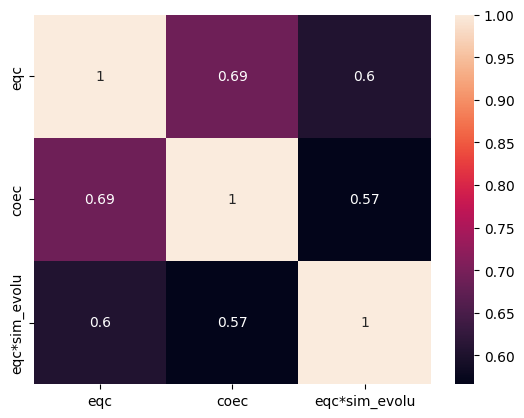

In [85]:
sns.heatmap(df_last[["eqc",	"coec",		"eqc*sim_evolu"]].corr(),annot= True)

<Axes: >

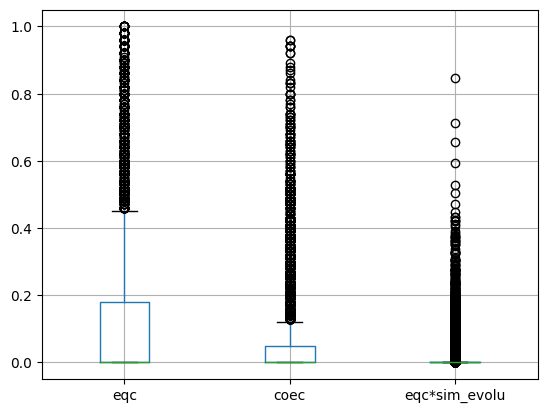

In [106]:
df_last[["eqc",	"coec",		"eqc*sim_evolu"]].boxplot()

In [103]:
# Nombre de valeurs == 0 
print("eqc:" ,(df_last["eqc"] == 0).sum()/df_last.size * 100)
print("coec:" ,(df_last["coec"] == 0).sum()/df_last.size * 100)

eqc: 3.9980266212660576
coec: 4.170213589227674


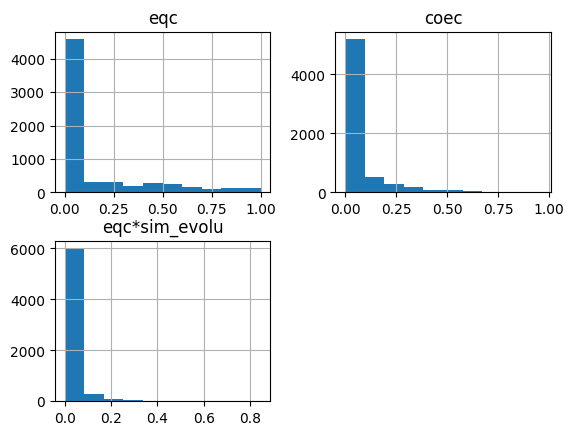

In [108]:
(df_last[["eqc",	"coec",		"eqc*sim_evolu"]]).hist()
plt.show()

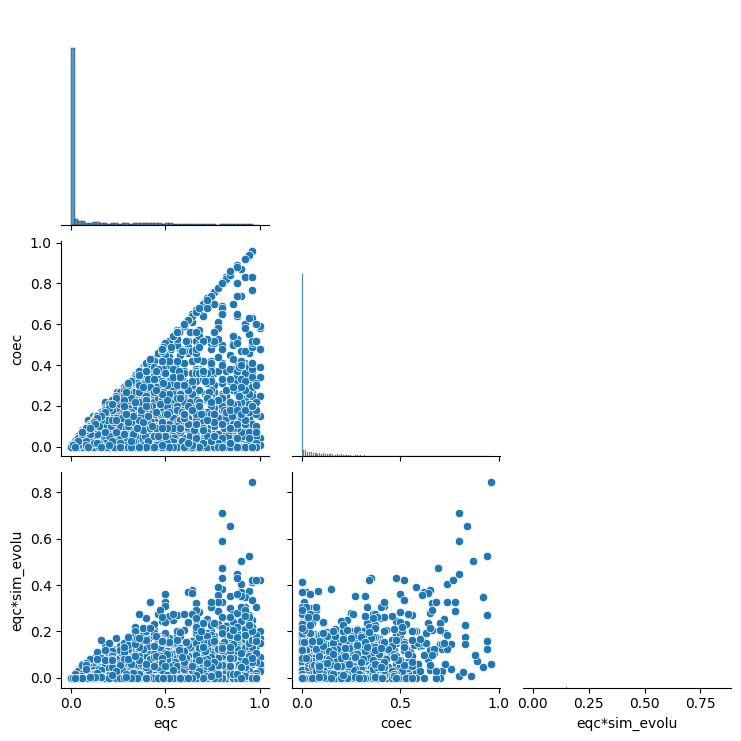

In [109]:
sns.pairplot(df_last[["eqc",	"coec",		"eqc*sim_evolu"]], corner= True)
plt.show()

* Il est intéressant de remarquer que la co-écriture `coec` peut être plus grande que `eqc*sim_evol`. Ce n'est pas le cas entre `coec` et `eqc`.